# Final Project: Used Car Price Predictor
### Author: Satish Agrawal, Sanjay Jaras

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
import seaborn as sns

## Configurations


In [3]:
%matplotlib inline
plt.style.use("seaborn-darkgrid")
np.random.seed(17)

## Load Data
Data downloaded from https://www.kaggle.com/austinreese/craigslist-carstrucks-data


In [4]:
org_df = pd.read_csv("vehicles.csv", index_col=[0])

### Show summary

In [5]:
org_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


### Show Original Data types

In [6]:
org_df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object

### Let's drop column that we will not be using

In [7]:
columns = ["region", "price", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status", "transmission", 
           "drive", "size", "type", "paint_color", "state", "lat", "long", "posting_date"]
df_sel = org_df[columns]


### Consider dropping columns instead of subsetting for better clarity
#df_sel = org_df.drop(columns=['url', 'id','region_url','county','vin'])

# drop NA in important columns
df_sel = df_sel.dropna(subset=['year','condition','model','manufacturer'])

NameError: name 'df' is not defined

### Rename size column name to avoid keyword issue

In [8]:
df_sel.rename(columns={"size":"size_"}, inplace=True)

C:\applications\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
df_sel.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size_,type,paint_color,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


### Convert variables to appropriate data types

In [10]:
df_sel.region = pd.Categorical(df_sel.region)
df_sel.year = pd.Categorical(df_sel.year)
df_sel.manufacturer = pd.Categorical(df_sel.manufacturer)
df_sel.model = pd.Categorical(df_sel.model)
df_sel.condition = pd.Categorical(df_sel.condition)
df_sel.fuel = pd.Categorical(df_sel.fuel)
df_sel.title_status = pd.Categorical(df_sel.title_status)
df_sel.transmission = pd.Categorical(df_sel.transmission)
df_sel.drive = pd.Categorical(df_sel.drive)
df_sel.size_ = pd.Categorical(df_sel.size_)
df_sel.type = pd.Categorical(df_sel.type)
df_sel.paint_color = pd.Categorical(df_sel.paint_color)
df_sel.state = pd.Categorical(df_sel.state)

C:\applications\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
# Cylinders column has mixed data types. Some of the data are float and others are string. Converting them all to number. 
# Some of teh observations have a suffix of cylinders, removing that

df_sel.cylinders = df_sel.cylinders.astype(str).apply(lambda x : x.replace(" cylinders", ""))

In [12]:
df_sel.year.unique()

[2010.0, 2014.0, 2006.0, 1974.0, 2005.0, ..., 1914.0, 1915.0, 1943.0, 1910.0, 1921.0]
Length: 111
Categories (110, float64): [2010.0, 2014.0, 2006.0, 1974.0, ..., 1915.0, 1943.0, 1910.0, 1921.0]

In [13]:
df_sel = df_sel[df_sel.year.notnull()]
df_sel["age"] = df_sel.year.apply(lambda x: int(2020-x))

In [14]:
df_sel.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size_,type,paint_color,state,lat,long,posting_date,age
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,10
1,auburn,7500,2014.0,hyundai,sonata,excellent,4,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,32.547500,-85.468200,2020-12-02T02:11:50-0600,6
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600,14
3,auburn,2000,1974.0,chevrolet,c-10,good,4,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600,46
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600,15


### Need to replace other to something else

<AxesSubplot:xlabel='model', ylabel='count'>

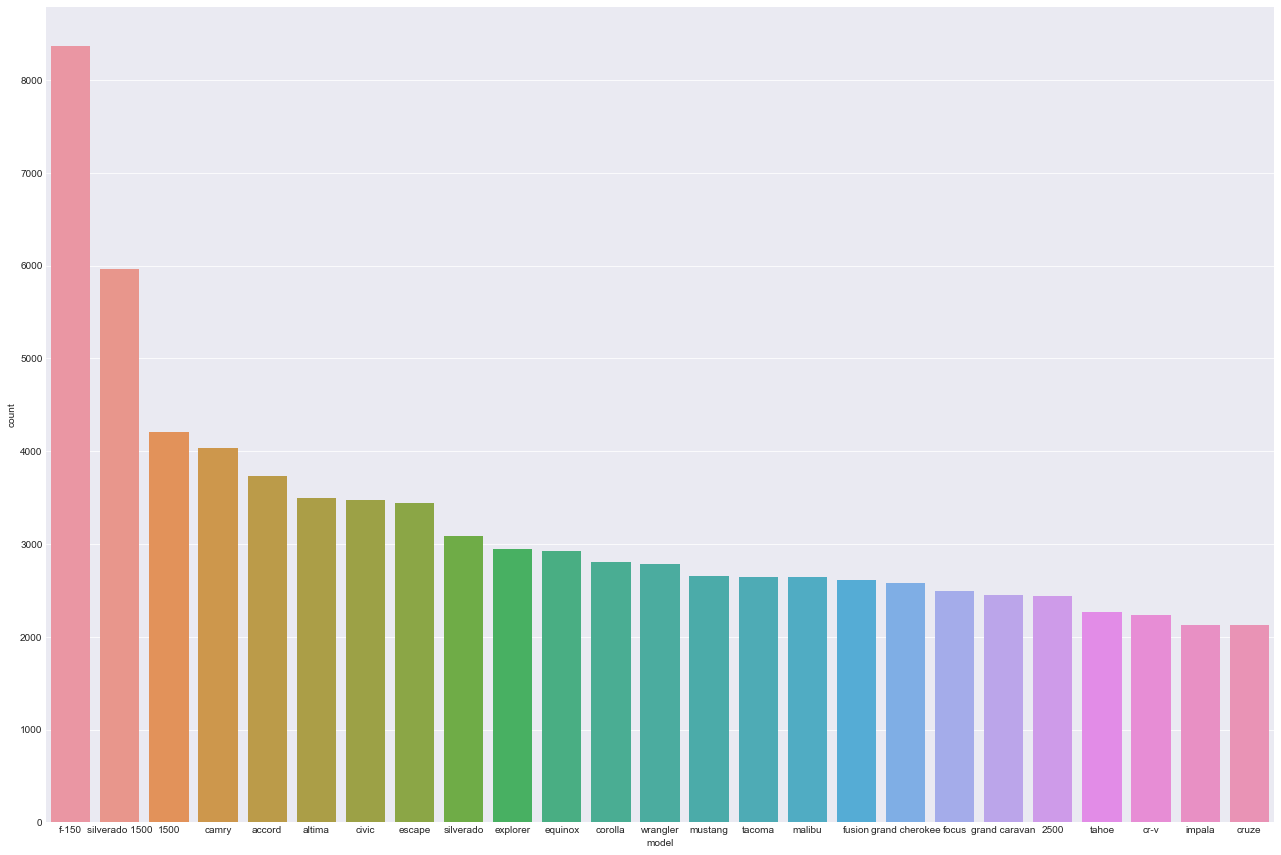

In [15]:
fig, ax =plt.subplots(1,figsize=(22, 15))
sns.countplot(x ='model', data = df_sel, order=df_sel.model.value_counts().iloc[:25].index)

<AxesSubplot:xlabel='manufacturer', ylabel='count'>

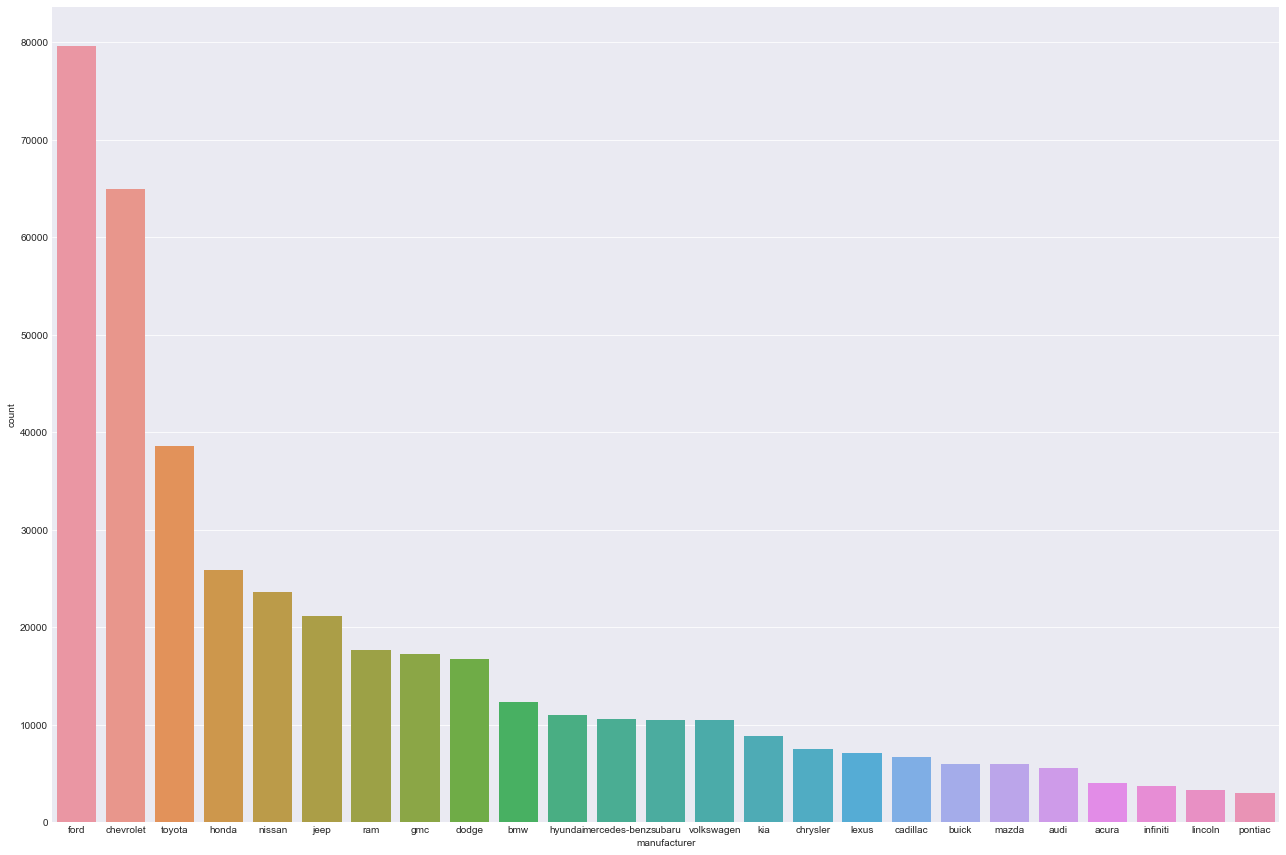

In [16]:
fig, ax =plt.subplots(1,figsize=(22, 15))
sns.countplot(x ='manufacturer',data = df_sel,order=df_sel.manufacturer.value_counts().iloc[:25].index)

<AxesSubplot:xlabel='type', ylabel='count'>

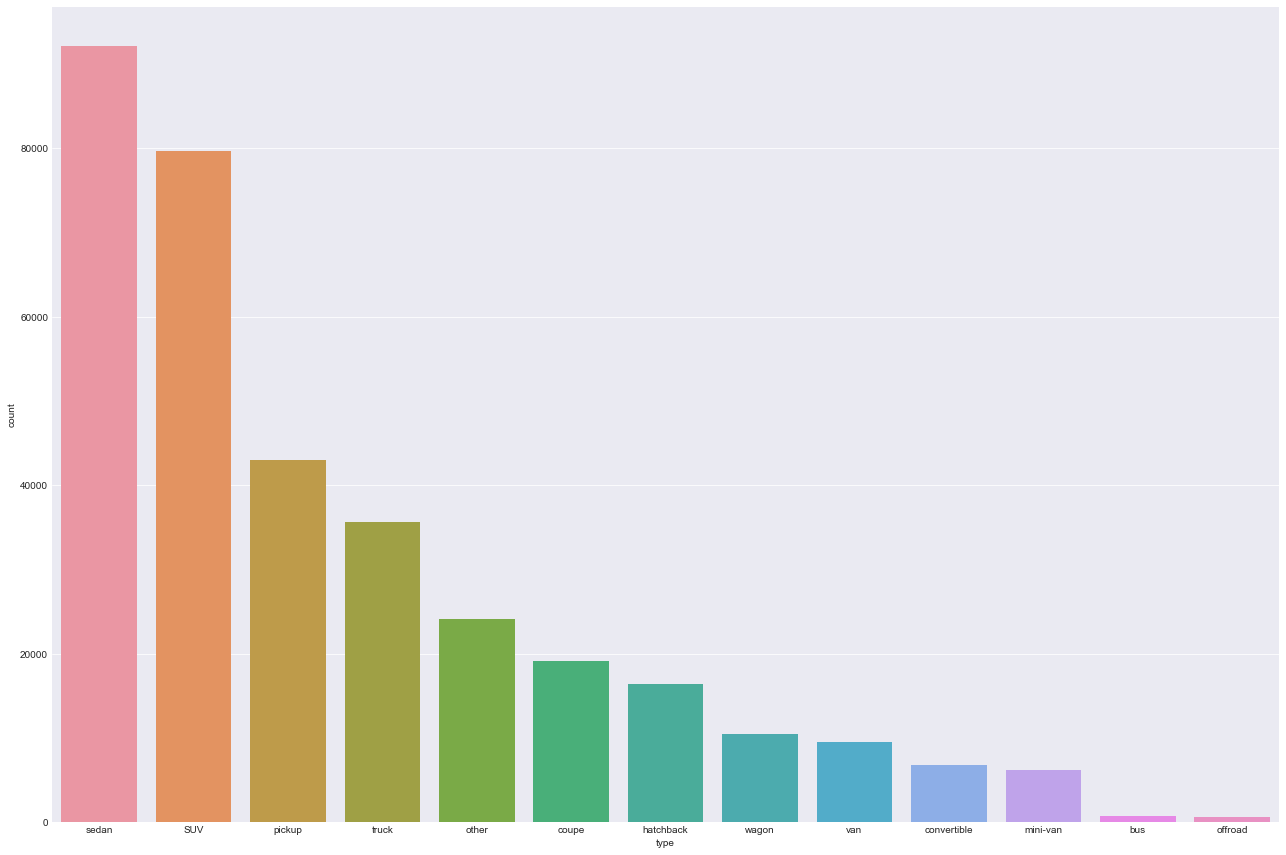

In [17]:
fig, ax =plt.subplots(1,figsize=(22, 15))
sns.countplot(x ='type',data = df_sel,order=df_sel.type.value_counts().iloc[:15].index)

In [18]:
#sns.pairplot(data = df_sel)

In [25]:
df_sel.condition.unique()
df_sel = df_sel.dropna()

In [26]:
df_sel.condition.unique()

['good', 'excellent', 'like new', 'salvage', 'new', 'fair']
Categories (6, object): ['good', 'excellent', 'like new', 'salvage', 'new', 'fair']

In [33]:
df_dummies = pd.get_dummies(df_sel.condition)

In [43]:
df_condition = pd.concat([df_sel.price, df_dummies], axis=1)
df_condition

,price,excellent,fair,good,like new,new,salvage
3,2000,0,0,1,0,0,0
4,19500,1,0,0,0,0,0
14,4900,0,0,1,0,0,0
19,47000,0,0,0,1,0,0
47,6250,0,0,1,0,0,0
...,...,...,...,...,...,...,...
458204,4495,0,0,1,0,0,0
458208,14995,1,0,0,0,0,0
458209,17895,1,0,0,0,0,0
458210,17900,1,0,0,0,0,0


In [38]:
df_condition.corr()

,price,excellent,fair,good,like new,new,salvage
price,1.000000,-0.003403,-0.000828,0.004612,-0.000937,-0.000184,-0.000235
excellent,-0.003403,1.000000,-0.185748,-0.701358,-0.369742,-0.070776,-0.052958
fair,-0.000828,-0.185748,1.000000,-0.139966,-0.073787,-0.014124,-0.010568
good,0.004612,-0.701358,-0.139966,1.000000,-0.278610,-0.053332,-0.039905
like new,-0.000937,-0.369742,-0.073787,-0.278610,1.000000,-0.028116,-0.021037
new,-0.000184,-0.070776,-0.014124,-0.053332,-0.028116,1.000000,-0.004027
salvage,-0.000235,-0.052958,-0.010568,-0.039905,-0.021037,-0.004027,1.000000


In [42]:
from scipy.stats import pointbiserialr
from scipy.stats import kruskal
from scipy.stats import f_oneway
print(pointbiserialr(df_condition.price, df_condition.excellent))
print(kruskal(df_condition.price, df_condition.excellent))
print(f_oneway(df_condition.price, df_condition.excellent))

PointbiserialrResult(correlation=-0.003403035295270047, pvalue=0.3112394691546174)
KruskalResult(statistic=121904.37668840126, pvalue=0.0)
F_onewayResult(statistic=1.849893680555269, pvalue=0.17379749180807452)
